In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("Amreli and MSP NRM data.csv")

In [3]:
df.columns

Index(['batch', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)', 'Voltage', 'Frequency',
       'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Refractory lining'],
      dtype='object')

In [4]:
df1 = df.drop(['Scrap (MT)','Sponge (MT)','Hot Heel (MT)','Alloys (MT)','Rating of the furnace (KW)','Refractory lining'],axis=1)

In [5]:
df1

,batch,Heat number (life number),Total Heat Time (minutes),Input (MT),Final C%,Tapping Temperature (C),Output (MT),Input energy (KWH),Voltage,Frequency,Melt rate (MT/Hr),Efficiency (MT/KWH)
0,1,1,130,39.747073,0.201,1693,32.643,25950.00985,3728,273,15.066000,0.001258
1,1,2,135,34.921707,0.204,1685,30.466,20315.33812,3740,274,13.540444,0.001500
2,1,3,125,32.072049,0.203,1633,28.290,17880.32673,3731,275,13.579200,0.001582
3,1,4,110,29.406098,0.192,1686,26.114,16040.34170,3764,270,14.244000,0.001628
4,1,5,115,30.527927,0.196,1689,27.202,17353.32549,3756,274,14.192348,0.001568
...,...,...,...,...,...,...,...,...,...,...,...,...
490,10,43,145,16.657195,0.200,1665,14.000,10080.00000,3300,480,5.793103,0.001389
491,10,44,160,16.662683,0.180,1680,14.000,11476.00000,3300,480,5.250000,0.001220
492,10,45,180,15.440976,0.200,1690,13.000,12156.00000,3300,480,4.333333,0.001069
493,10,46,175,16.667073,0.200,1690,14.000,13264.00000,3300,480,4.800000,0.001055


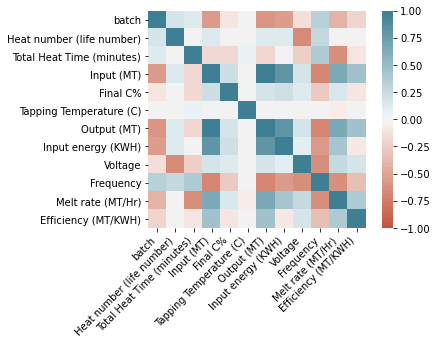

In [6]:
cor = df1.corr()
ax = sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

write inferences here when tapping temperature is taken same as it is

In [7]:
df1.describe()

,batch,Heat number (life number),Total Heat Time (minutes),Input (MT),Final C%,Tapping Temperature (C),Output (MT),Input energy (KWH),Voltage,Frequency,Melt rate (MT/Hr),Efficiency (MT/KWH)
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,5.810101,25.995960,130.141414,32.001816,0.224992,1676.298990,26.773416,16991.287913,3542.103030,303.765657,12.927118,0.001579
std,2.811252,15.480299,33.191876,5.653419,0.032449,63.741472,4.697102,2467.001760,177.784827,61.187024,3.571228,0.000245
min,1.000000,1.000000,30.000000,14.496463,0.000000,300.000000,11.969000,3795.000000,3063.000000,254.000000,2.794521,0.000689
25%,3.500000,13.000000,115.000000,30.883317,0.203000,1670.500000,26.110000,16230.428720,3381.000000,267.000000,12.554308,0.001530
50%,6.000000,25.000000,120.000000,33.083829,0.221000,1682.000000,27.750000,17342.052900,3543.000000,277.000000,13.650545,0.001595
75%,8.000000,38.000000,135.000000,35.698415,0.248000,1689.000000,29.378000,18398.838750,3744.000000,314.000000,14.623680,0.001641
max,10.000000,63.000000,560.000000,41.052268,0.340000,1725.000000,33.731000,29216.888070,3770.000000,480.000000,56.580000,0.004480


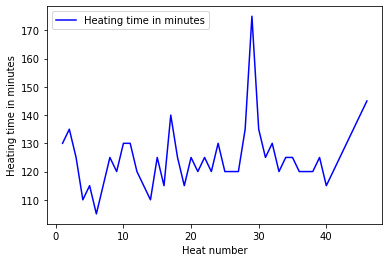

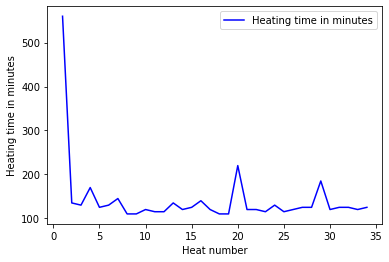

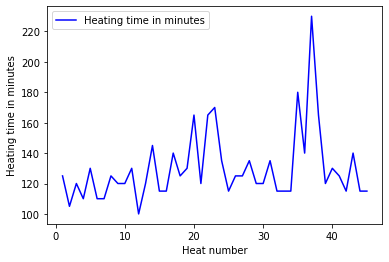

In [8]:
for i in range(1,4):
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Total Heat Time (minutes)'],c='b');
    plt.xlabel('Heat number')
    plt.ylabel('Heating time in minutes')
    plt.legend(['Heating time in minutes'])
    plt.show()

In [9]:
df.columns

Index(['batch', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)', 'Voltage', 'Frequency',
       'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Refractory lining'],
      dtype='object')

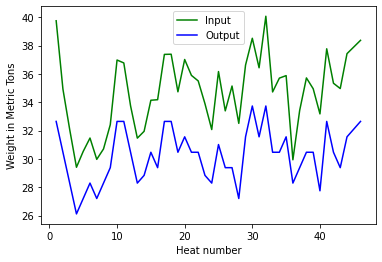

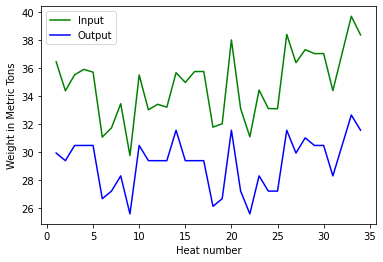

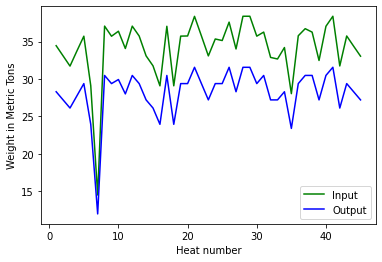

In [10]:
for i in range(1,4):
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Input (MT)'],c='g');
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Output (MT)'],c='b');
    plt.xlabel('Heat number')
    plt.ylabel('Weight in Metric Tons')
    plt.legend(['Input','Output'])
    plt.show()
#Amreli one and MSP one
#input output trends

In [11]:
sns.set_style(style="white")

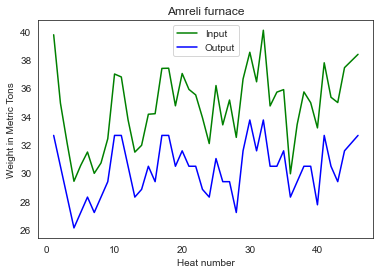

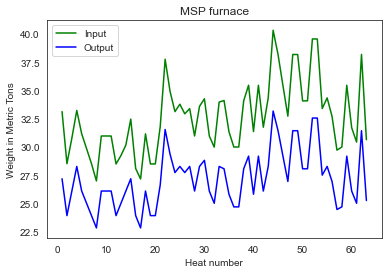

In [12]:
for i in (1,9):
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Input (MT)'],c='g');
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Output (MT)'],c='b');
    plt.xlabel('Heat number')
    plt.ylabel('Weight in Metric Tons')
    plt.legend(['Input','Output'])
    if i == 1:
        plt.title("Amreli furnace")
    else:
        plt.title("MSP furnace")
    plt.show()

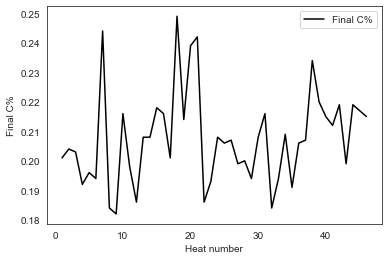

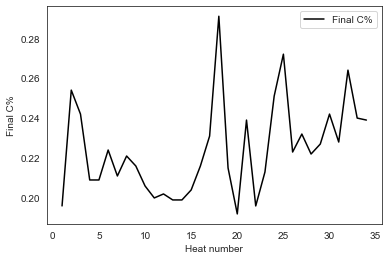

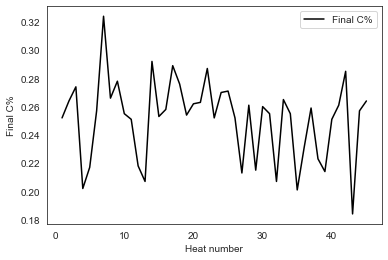

In [13]:
for i in range(1,4):
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Final C%'],c='k');
    plt.xlabel('Heat number')
    plt.ylabel('Final C%')
    plt.legend(['Final C%'])
    plt.show()

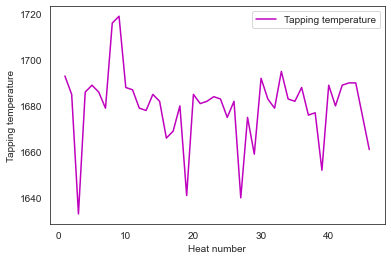

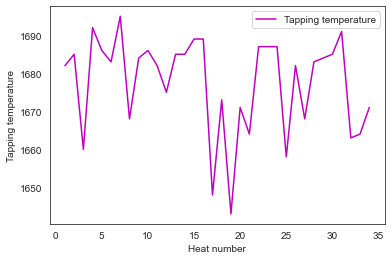

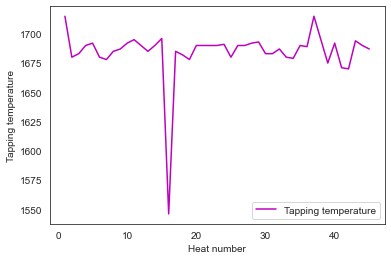

In [14]:
for i in range(1,4):
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Tapping Temperature (C)'],c='m');
    plt.xlabel('Heat number')
    plt.ylabel('Tapping temperature')
    plt.legend(['Tapping temperature'])
    plt.show()

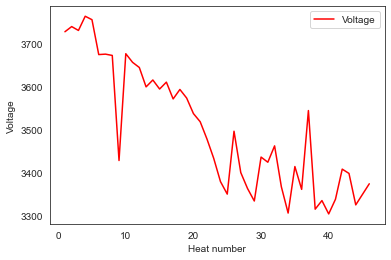

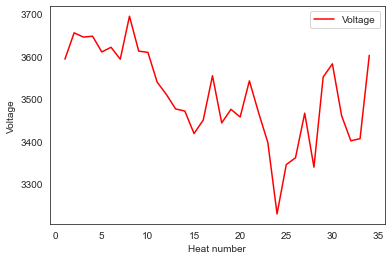

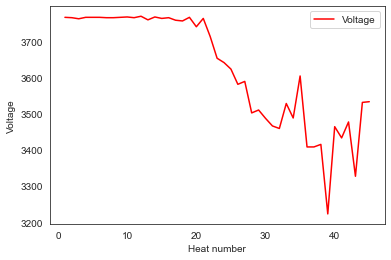

In [15]:
for i in range(1,4):
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Voltage'],c='r');
    plt.xlabel('Heat number')
    plt.ylabel('Voltage')
    plt.legend(['Voltage'])
    plt.show()

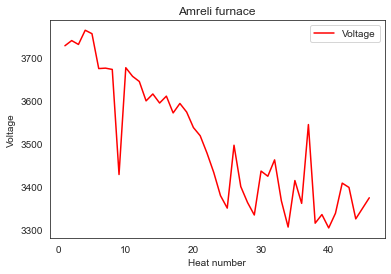

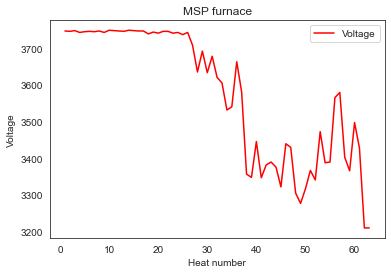

In [16]:
for i in (1,9):
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Voltage'],c='r');
    plt.xlabel('Heat number')
    plt.ylabel('Voltage')
    plt.legend(['Voltage'])
    if i==1:
        plt.title("Amreli furnace")
    else:
        plt.title("MSP furnace")
    plt.show()

In [17]:
df.columns

Index(['batch', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)', 'Voltage', 'Frequency',
       'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Refractory lining'],
      dtype='object')

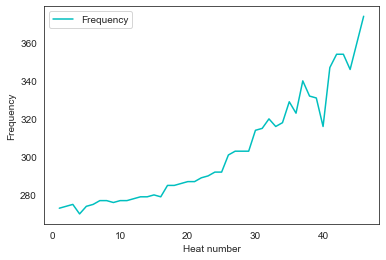

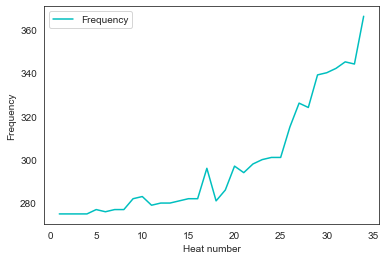

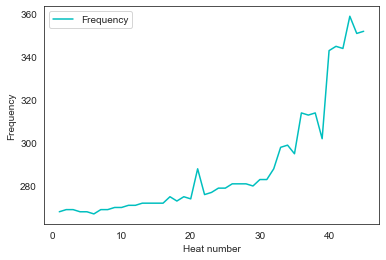

In [18]:
for i in range(1,4):
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Frequency'],c='c');
    plt.xlabel('Heat number')
    plt.ylabel('Frequency')
    plt.legend(['Frequency'])
    plt.show()

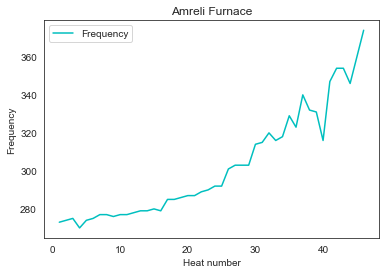

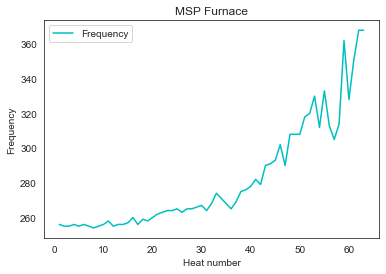

In [19]:
for i in (1,9):
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Frequency'],c='c');
    plt.xlabel('Heat number')
    plt.ylabel('Frequency')
    plt.legend(['Frequency'])
    if i==1:
        plt.title("Amreli Furnace")
    else:
        plt.title("MSP Furnace")
    plt.show()

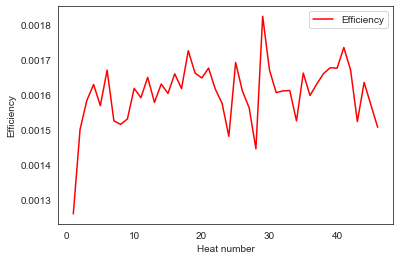

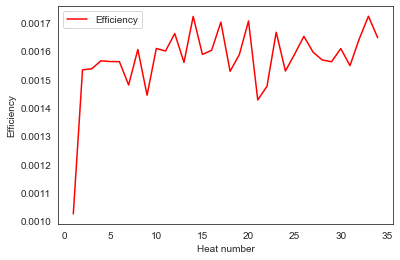

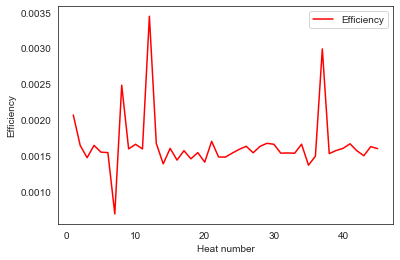

In [20]:
for i in range(1,4):
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Efficiency (MT/KWH)'],c='r');
    plt.xlabel('Heat number')
    plt.ylabel('Efficiency')
    plt.legend(['Efficiency'])
    plt.show()

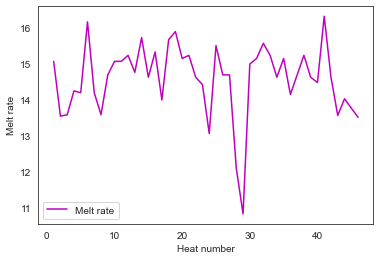

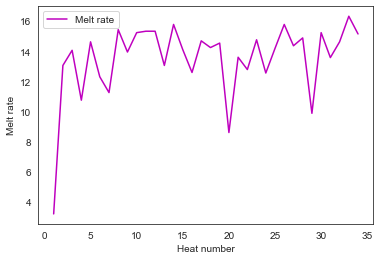

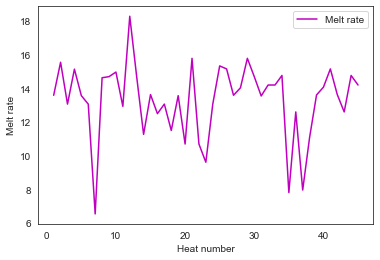

In [21]:
for i in range(1,4):
    plt.plot(df[df['batch']==i]['Heat number (life number)'],df[df['batch']==i]['Melt rate (MT/Hr)'],c='m');
    plt.xlabel('Heat number')
    plt.ylabel('Melt rate')
    plt.legend(['Melt rate'])
    plt.show()

In [22]:
sns.set_style('darkgrid')

In [23]:
df.columns

Index(['batch', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)', 'Voltage', 'Frequency',
       'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Refractory lining'],
      dtype='object')

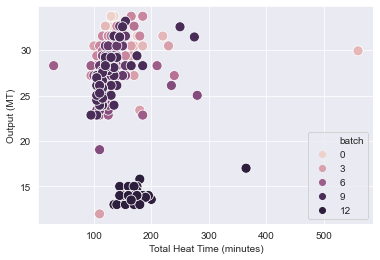

In [24]:
sns.scatterplot(data = df, x= 'Total Heat Time (minutes)',y='Output (MT)',hue=df.batch, s=100);

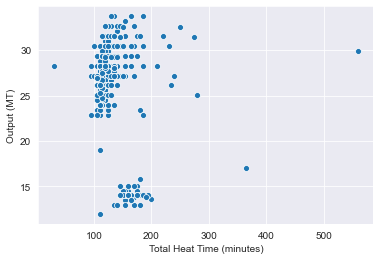

In [25]:
sns.scatterplot(data = df, x= 'Total Heat Time (minutes)',y='Output (MT)');

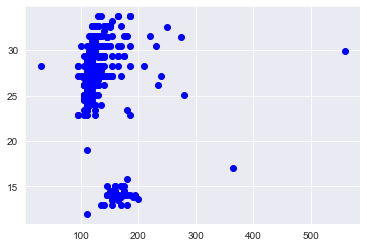

In [26]:
plt.scatter(data = df, x= 'Total Heat Time (minutes)',y='Output (MT)',c='b');

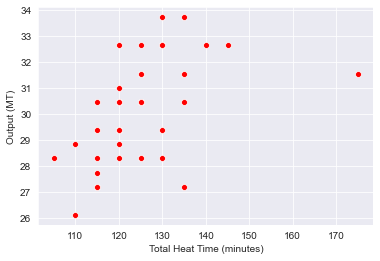

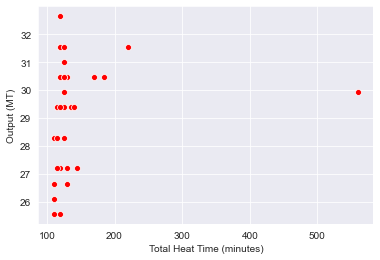

In [27]:
for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Total Heat Time (minutes)',y='Output (MT)',color='red');
    plt.show()

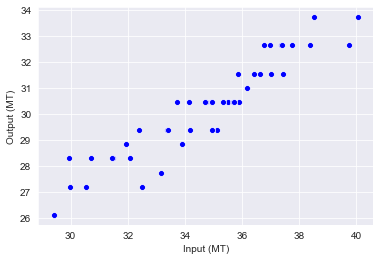

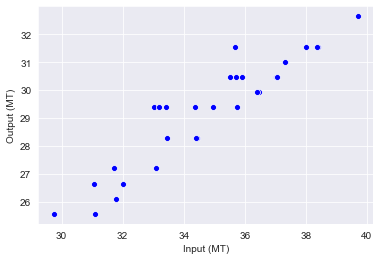

In [28]:
for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Input (MT)',y='Output (MT)',color='blue');
    plt.show()

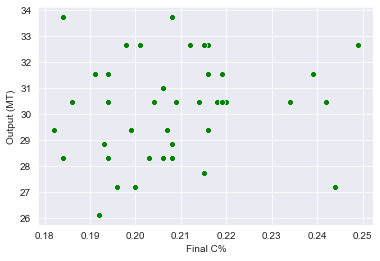

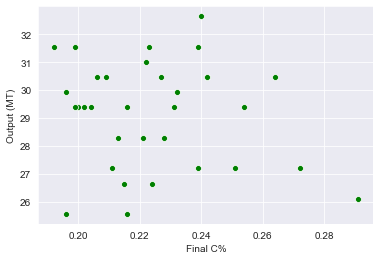

In [29]:
for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Final C%',y='Output (MT)',color='green');
    plt.show()

In [30]:
df.columns

Index(['batch', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)', 'Voltage', 'Frequency',
       'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Refractory lining'],
      dtype='object')

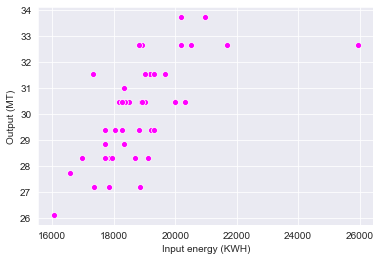

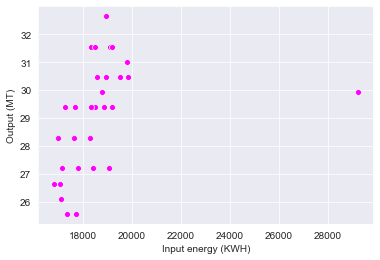

In [31]:
for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Input energy (KWH)',y='Output (MT)',color='magenta');
    plt.show()

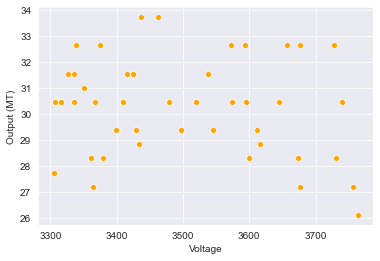

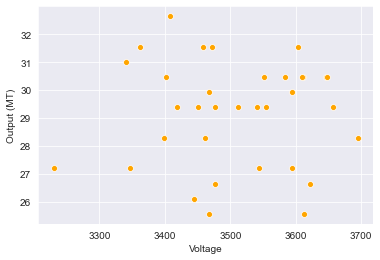

In [32]:
for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Voltage',y='Output (MT)',color='orange');
    plt.show()

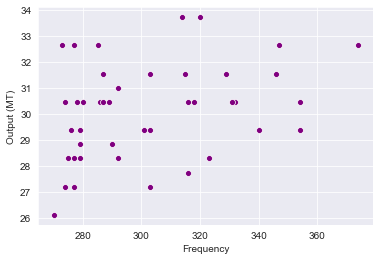

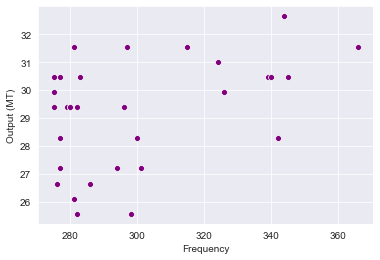

In [33]:
for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Frequency',y='Output (MT)',color='purple');
    plt.show()

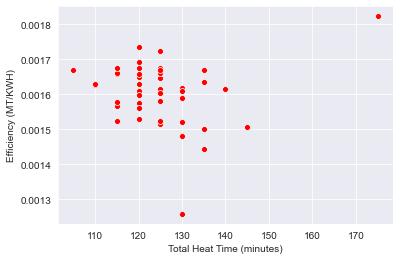

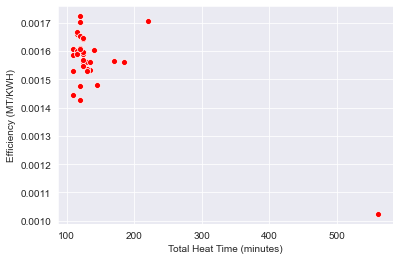

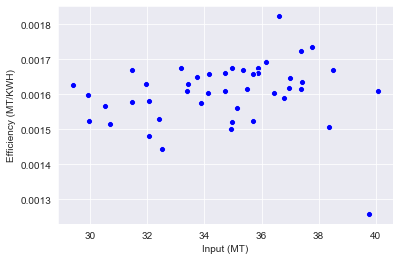

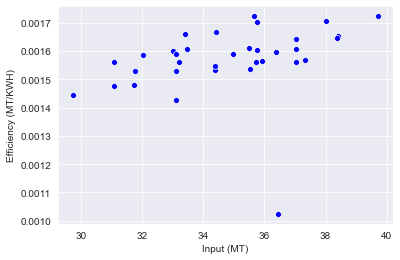

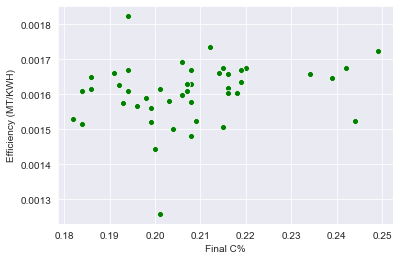

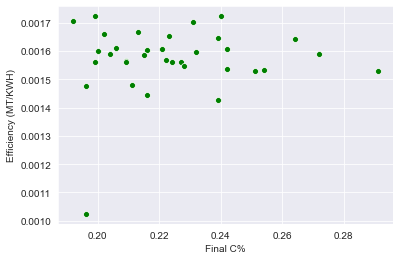

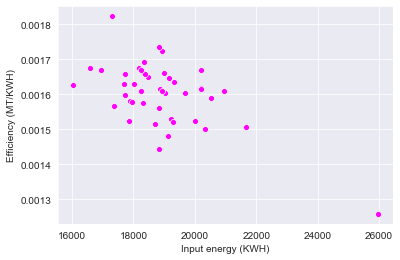

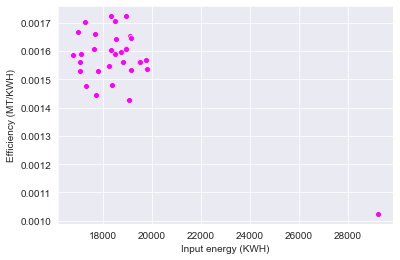

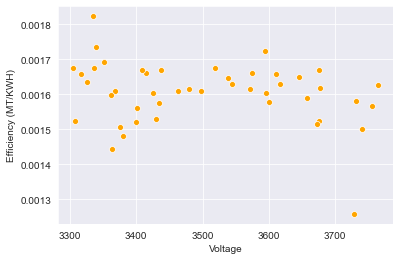

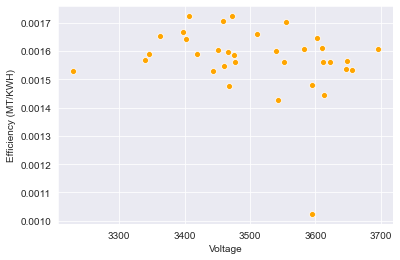

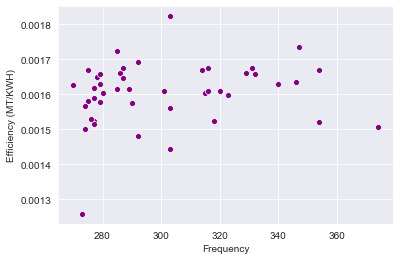

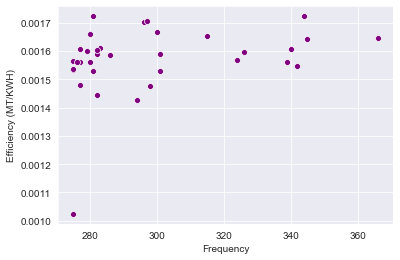

In [34]:
for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Total Heat Time (minutes)',y='Efficiency (MT/KWH)',color='red');
    plt.show()

for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Input (MT)',y='Efficiency (MT/KWH)',color='blue');
    plt.show()

for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Final C%',y='Efficiency (MT/KWH)',color='green');
    plt.show()

for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Input energy (KWH)',y='Efficiency (MT/KWH)',color='magenta');
    plt.show()

for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Voltage',y='Efficiency (MT/KWH)',color='orange');
    plt.show()

for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Frequency',y='Efficiency (MT/KWH)',color='purple');
    plt.show()

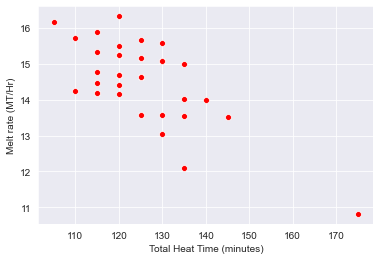

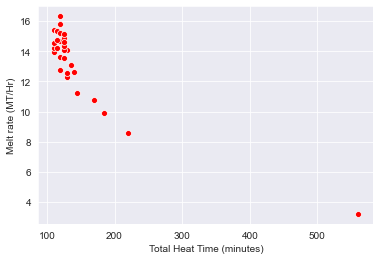

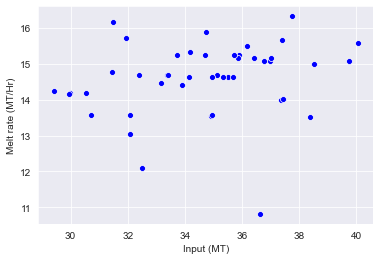

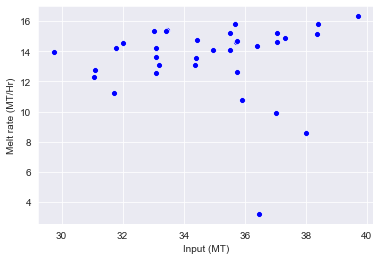

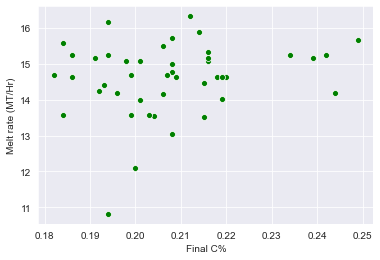

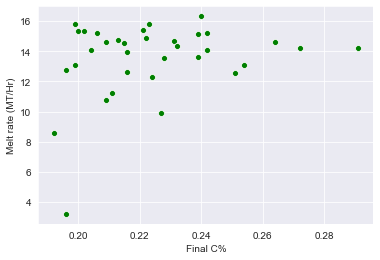

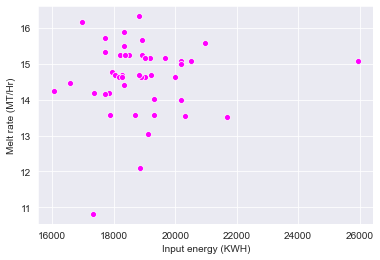

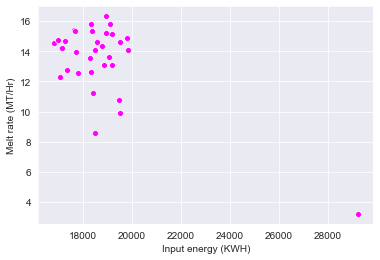

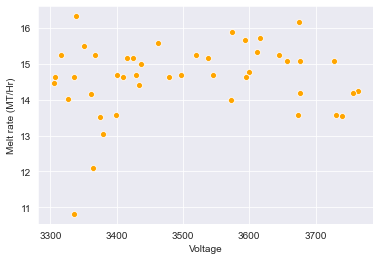

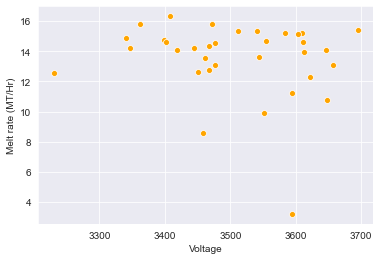

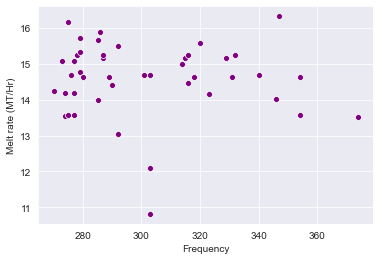

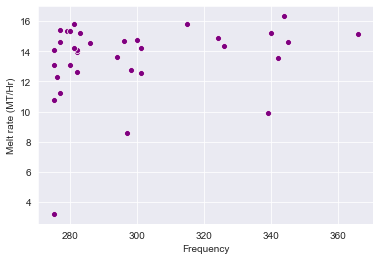

In [35]:
for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Total Heat Time (minutes)',y='Melt rate (MT/Hr)',color='red');
    plt.show()

for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Input (MT)',y='Melt rate (MT/Hr)',color='blue');
    plt.show()

for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Final C%',y='Melt rate (MT/Hr)',color='green');
    plt.show()

for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Input energy (KWH)',y='Melt rate (MT/Hr)',color='magenta');
    plt.show()

for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Voltage',y='Melt rate (MT/Hr)',color='orange');
    plt.show()

for i in range(1,3):
    sns.scatterplot(data = df[df['batch']==i], x= 'Frequency',y='Melt rate (MT/Hr)',color='purple');
    plt.show()

# Linear Regression with output as target variable

Mean squared error on training set is 0.3115495757050024
Mean squared error on testing set is 0.2965872766427375
R_squared is 0.985832339854267
Total Heat Time (minutes) weight is : -0.002969329968224277
Final C% weight is : -6.072977186368666
Voltage weight is : -0.0005718083422962244
Frequency weight is : -0.0018558082021815892
Input (MT) weight is : 0.7811210936646305
Input energy (KWH) weight is : 0.00010558487876771804


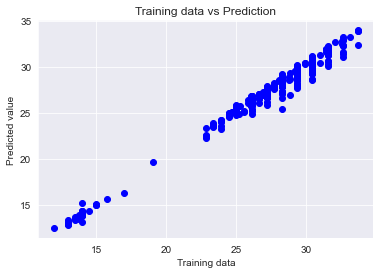

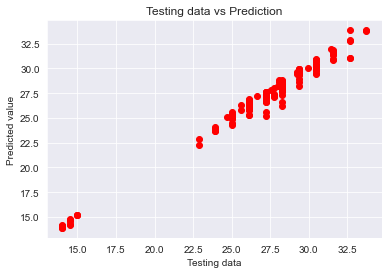

In [36]:
#Taking features and target
cols = ['Total Heat Time (minutes)', 'Final C%', 'Voltage', 'Frequency',  'Input (MT)','Input energy (KWH)','Output (MT)','batch']
dflr = df[cols]
X = dflr.iloc[:,:-2].values
X_train, X_test, y_train, y_test = train_test_split(X, dflr['Output (MT)'].values, stratify = dflr['batch'].values, test_size = 0.3, random_state=40)


#Building linear regression model with output as the target variable
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Mean squared error on training set is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Mean squared error on testing set is {}".format(mean_squared_error(y_test, y_pred_test)))

print("R_squared is {}".format(r2_score(y_test, y_pred_test)))
for i in range(6):
    print(cols[i]+' weight is : {}'.format(lr.coef_[i]))

plt.scatter(y_train, y_pred_train, c='b');
plt.xlabel('Training data')
plt.ylabel('Predicted value')
plt.title('Training data vs Prediction')
plt.show()

plt.scatter(y_test, y_pred_test, c='r');
plt.xlabel('Testing data')
plt.ylabel('Predicted value')
plt.title('Testing data vs Prediction')
plt.show()

# NMSE metric

In [37]:
error_train = np.sum(np.square(y_pred_train-y_train))
nmse_train = (error_train/np.sum(np.square(y_train-np.mean(y_train))))*100
print('Normalised MSE',nmse_train)
error_test = np.sum(np.square(y_pred_test-y_test))
nmse_test = (error_test/np.sum(np.square(y_test-np.mean(y_test))))*100
print('Normalised MSE',nmse_test)

Normalised MSE 1.3857430016363075
Normalised MSE 1.416766014573296


In [51]:
#normalized
#Taking features and target
cols = ['Total Heat Time (minutes)', 'Final C%', 'Voltage', 'Frequency',  'Input (MT)','Input energy (KWH)','Output (MT)','batch']
dflr = df[cols]
X = dflr.iloc[:,:-2].values
X_train, X_test, y_train, y_test = train_test_split(X, dflr['Output (MT)'].values, stratify = dflr['batch'].values, test_size = 0.3, random_state=40)

#Standardizing data
normalizer = preprocessing.Normalizer()
normalized_X_train = normalizer.fit_transform(X_train)
normalized_X_test = normalizer.transform(X_test)

#Building linear regression model with output as the target variable
lr = LinearRegression()
lr.fit(normalized_X_train, y_train)
y_pred_train = lr.predict(normalized_X_train)
y_pred_test = lr.predict(normalized_X_test)

print("Mean squared error on training set is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Mean squared error on testing set is {}".format(mean_squared_error(y_test, y_pred_test)))

print("R_squared is {}".format(r2_score(y_test, y_pred_test)))
for i in range(6):
    print(cols[i]+' weight is : {}'.format(lr.coef_[i]))

Mean squared error on training set is 0.9711384726132563
Mean squared error on testing set is 0.9230383141577533
R_squared is 0.9559074371479868
Total Heat Time (minutes) weight is : -26.992611618954335
Final C% weight is : -114263.65461819814
Voltage weight is : -110.46595286584451
Frequency weight is : -105.65241464308531
Input (MT) weight is : 10157.29021081159
Input energy (KWH) weight is : -119.53827167834251


In [45]:
df.columns

Index(['batch', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)', 'Voltage', 'Frequency',
       'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Refractory lining'],
      dtype='object')

# Linear Regression with Efficiency as target variable

Mean squared error on training set is 1.0555691890227903e-08
Mean squared error on testing set is 8.1323932003342e-09
R_squared is 0.7541578895878498
Total Heat Time (minutes) weight is : 2.2651366608156704e-06
Final C% weight is : -0.0009953349490298832
Voltage weight is : -5.922494651427183e-09
Frequency weight is : -9.641130553988185e-07
Input (MT) weight is : 6.821755979294208e-05
Input energy (KWH) weight is : -1.4915706515441566e-07


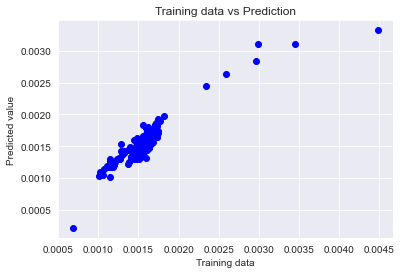

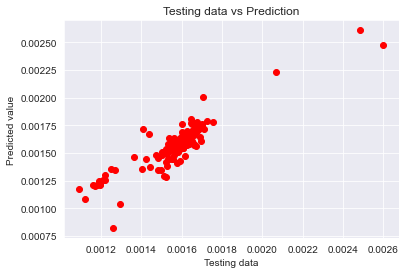

In [54]:

#Taking features and target
cols = ['Total Heat Time (minutes)', 'Final C%', 'Voltage', 'Frequency', 'Input (MT)','Input energy (KWH)','Efficiency (MT/KWH)','batch']
dflr = df[cols]
X = dflr.iloc[:,:-2].values
X_train, X_test, y_train, y_test = train_test_split(X, dflr['Efficiency (MT/KWH)'].values, stratify = dflr['batch'].values, test_size = 0.3, random_state=40)



#Building linear regression model with output as the target variable
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Mean squared error on training set is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Mean squared error on testing set is {}".format(mean_squared_error(y_test, y_pred_test)))

print("R_squared is {}".format(r2_score(y_test, y_pred_test)))
for i in range(6):
    print(cols[i]+' weight is : {}'.format(lr.coef_[i]))

plt.scatter(y_train, y_pred_train, c='b');
plt.xlabel('Training data')
plt.ylabel('Predicted value')
plt.title('Training data vs Prediction')
plt.show()

plt.scatter(y_test, y_pred_test, c='r');
plt.xlabel('Testing data')
plt.ylabel('Predicted value')
plt.title('Testing data vs Prediction')
plt.show()

Mean squared error on training set is 1.0589776668502705e-09
Mean squared error on testing set is 9.756023377957325e-10
R_squared is 0.9705075576477445
Total Heat Time (minutes) weight is : -0.002732235174869073
Final C% weight is : -3.328754814995096
Voltage weight is : -0.001355103126986403
Frequency weight is : -0.0004651029626913921
Input (MT) weight is : 0.8212166854276635
Input energy (KWH) weight is : -0.008321769044248733


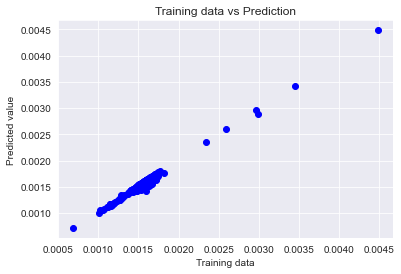

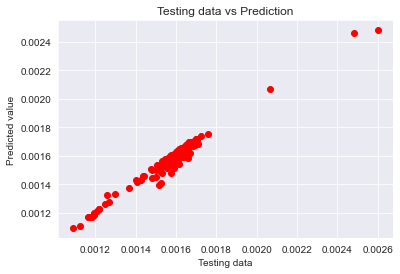

In [55]:
#normalized
#Taking features and target
cols = ['Total Heat Time (minutes)', 'Final C%', 'Voltage', 'Frequency', 'Input (MT)','Input energy (KWH)','Efficiency (MT/KWH)','batch']
dflr = df[cols]
X = dflr.iloc[:,:-2].values
X_train, X_test, y_train, y_test = train_test_split(X, dflr['Efficiency (MT/KWH)'].values, stratify = dflr['batch'].values, test_size = 0.3, random_state=40)

#Standardizing data
normalizer = preprocessing.Normalizer()
normalized_X_train = normalizer.fit_transform(X_train)
normalized_X_test = normalizer.transform(X_test)

#Building linear regression model with output as the target variable
lr = LinearRegression()
lr.fit(normalized_X_train, y_train)
y_pred_train = lr.predict(normalized_X_train)
y_pred_test = lr.predict(normalized_X_test)

print("Mean squared error on training set is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Mean squared error on testing set is {}".format(mean_squared_error(y_test, y_pred_test)))

print("R_squared is {}".format(r2_score(y_test, y_pred_test)))
for i in range(6):
    print(cols[i]+' weight is : {}'.format(lr.coef_[i]))
    
plt.scatter(y_train, y_pred_train, c='b');
plt.xlabel('Training data')
plt.ylabel('Predicted value')
plt.title('Training data vs Prediction')
plt.show()

plt.scatter(y_test, y_pred_test, c='r');
plt.xlabel('Testing data')
plt.ylabel('Predicted value')
plt.title('Testing data vs Prediction')
plt.show()

# Linear Regression: Testing is batch 4 data, Training is the remaining data

Mean squared error on training set is 1.051997426937568e-09
Mean squared error on testing set is 9.490741524052663e-10
R_squared is 0.7343989996433546
Total Heat Time (minutes) weight is : -0.00276817508057734
Final C% weight is : -4.580232113478081
Voltage weight is : -0.0010905171569657501
Frequency weight is : -0.0008553600410167604
Input (MT) weight is : 0.8229359219888247
Input energy (KWH) weight is : -0.00785857269677355


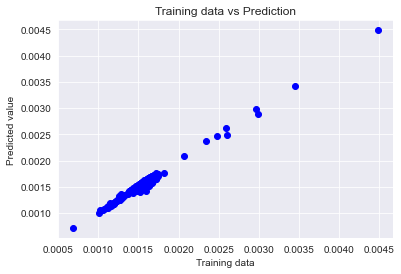

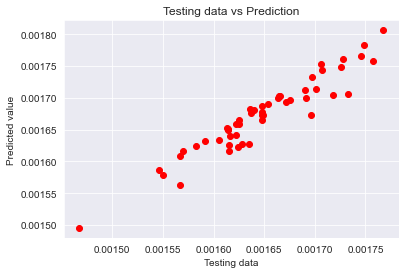

In [56]:
#normalized
#Taking features and target
df1 = df[df['batch']!=4]
cols = ['Total Heat Time (minutes)', 'Final C%', 'Voltage', 'Frequency', 'Input (MT)','Input energy (KWH)','Efficiency (MT/KWH)','batch']
dflr = df1[cols]
X_train = dflr.iloc[:,:-2].values
y_train = dflr['Efficiency (MT/KWH)'].values


#X_train, X_test, y_train, y_test = train_test_split(X, dflr['Efficiency (MT/KWH)'].values, stratify = dflr['batch'].values, test_size = 0.3, random_state=40)
df1 = df[df['batch']==4]
cols = ['Total Heat Time (minutes)', 'Final C%', 'Voltage', 'Frequency', 'Input (MT)','Input energy (KWH)','Efficiency (MT/KWH)','batch']
dflr = df1[cols]
X_test = dflr.iloc[:,:-2].values
y_test = dflr['Efficiency (MT/KWH)'].values


#Standardizing data
normalizer = preprocessing.Normalizer()
normalized_X_train = normalizer.fit_transform(X_train)
normalized_X_test = normalizer.transform(X_test)

#Building linear regression model with output as the target variable
lr = LinearRegression()
lr.fit(normalized_X_train, y_train)
y_pred_train = lr.predict(normalized_X_train)
y_pred_test = lr.predict(normalized_X_test)

print("Mean squared error on training set is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Mean squared error on testing set is {}".format(mean_squared_error(y_test, y_pred_test)))

print("R_squared is {}".format(r2_score(y_test, y_pred_test)))
for i in range(6):
    print(cols[i]+' weight is : {}'.format(lr.coef_[i]))
    
plt.scatter(y_train, y_pred_train, c='b');
plt.xlabel('Training data')
plt.ylabel('Predicted value')
plt.title('Training data vs Prediction')
plt.show()

plt.scatter(y_test, y_pred_test, c='r');
plt.xlabel('Testing data')
plt.ylabel('Predicted value')
plt.title('Testing data vs Prediction')
plt.show()

# NMSE metric without batch 4 data

In [50]:
error_train = np.sum(np.square(y_pred_train-y_train))
nmse_train = (error_train/np.sum(np.square(y_train-np.mean(y_train))))*100
print('Normalised MSE',nmse_train)
error_test = np.sum(np.square(y_pred_test-y_test))
nmse_test = (error_test/np.sum(np.square(y_test-np.mean(y_test))))*100
print('Normalised MSE',nmse_test)

Normalised MSE 1.5936269111320585
Normalised MSE 26.56010003566453


# NMSE metric for entire data

In [39]:
error_train = np.sum(np.square(y_pred_train-y_train))
nmse_train = (error_train/np.sum(np.square(y_train-np.mean(y_train))))*100
print('Normalised MSE',nmse_train)
error_test = np.sum(np.square(y_pred_test-y_test))
nmse_test = (error_test/np.sum(np.square(y_test-np.mean(y_test))))*100
print('Normalised MSE',nmse_test)

Normalised MSE 1.4754672918291336
Normalised MSE 2.949244235225542


# RMSE divided by max-min metric for entire data

In [46]:
nmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_train))/(np.max(y_train)-np.min(y_train)))*100
print('Normalised MSE',nmse_train)
error_test = np.sqrt(np.sum(np.square(y_pred_test-y_test)))
nmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test))/(np.max(y_train)-np.min(y_train)))*100
print('Normalised MSE',nmse_test)

Normalised MSE 4.136915274821487
Normalised MSE 1.2686051937803569


# RMSE metric for entire data

In [44]:
error_train = np.sqrt(np.sum(np.square(y_pred_train-y_train)))
print('Normalised MSE',error_train)
error_test = np.sqrt(np.sum(np.square(y_pred_test-y_test)))
print('Normalised MSE',error_test)

Normalised MSE 41.38850316877071
Normalised MSE 8.328842770133248


# Linear Regression with Melt-rate as target variable

Mean squared error on training set is 4.950890735697523
Mean squared error on testing set is 0.4655679321449722
R_squared is 0.9454738354492269
Total Heat Time (minutes) weight is : -0.05378140250916748
Final C% weight is : -9.90882682855766
Voltage weight is : -0.00040245871238740006
Frequency weight is : -0.006914247235049027
Input (MT) weight is : 0.3355888318549984
Input energy (KWH) weight is : -3.500680701941247e-05


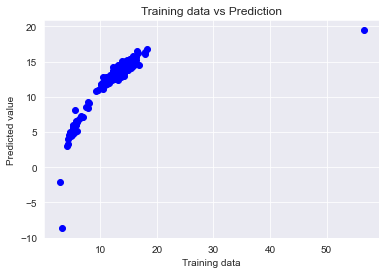

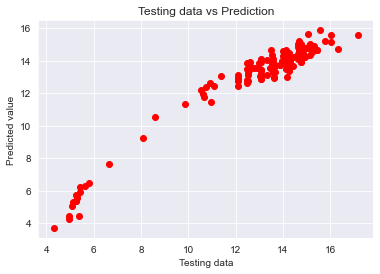

In [57]:
#Taking features and target
cols = ['Total Heat Time (minutes)', 'Final C%', 'Voltage', 'Frequency',  'Input (MT)','Input energy (KWH)','Melt rate (MT/Hr)','batch']
dflr = df[cols]
X = dflr.iloc[:,:-2].values
X_train, X_test, y_train, y_test = train_test_split(X, dflr['Melt rate (MT/Hr)'].values, stratify = dflr['batch'].values, test_size = 0.3, random_state=40)



#Building linear regression model with output as the target variable
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Mean squared error on training set is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Mean squared error on testing set is {}".format(mean_squared_error(y_test, y_pred_test)))

print("R_squared is {}".format(r2_score(y_test, y_pred_test)))
for i in range(6):
    print(cols[i]+' weight is : {}'.format(lr.coef_[i]))
    
plt.scatter(y_train, y_pred_train, c='b');
plt.xlabel('Training data')
plt.ylabel('Predicted value')
plt.title('Training data vs Prediction')
plt.show()

plt.scatter(y_test, y_pred_test, c='r');
plt.xlabel('Testing data')
plt.ylabel('Predicted value')
plt.title('Testing data vs Prediction')
plt.show()

# NMSE metric

In [41]:
error_train = np.sum(np.square(y_pred_train-y_train))
nmse_train = (error_train/np.sum(np.square(y_train-np.mean(y_train))))*100
print('Normalised MSE',nmse_train)
error_test = np.sum(np.square(y_pred_test-y_test))
nmse_test = (error_test/np.sum(np.square(y_test-np.mean(y_test))))*100
print('Normalised MSE',nmse_test)

Normalised MSE 34.09647120046439
Normalised MSE 5.452616455077309


Mean squared error on training set is 4.413783612596427
Mean squared error on testing set is 0.49468128837900427
R_squared is 0.9420641511839717
Total Heat Time (minutes) weight is : -1346.4257617400988
Final C% weight is : -78856.18660047342
Voltage weight is : -100.89589928178042
Frequency weight is : 64.904231234274
Input (MT) weight is : 3683.055300961367
Input energy (KWH) weight is : -433.417218697556


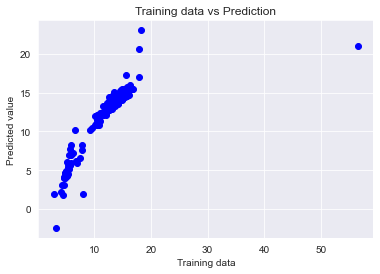

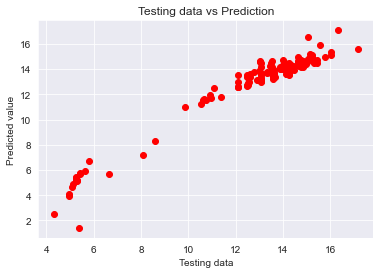

In [58]:
#normalized
#Taking features and target
cols = ['Total Heat Time (minutes)', 'Final C%', 'Voltage', 'Frequency',  'Input (MT)','Input energy (KWH)','Melt rate (MT/Hr)','batch']
dflr = df[cols]
X = dflr.iloc[:,:-2].values
X_train, X_test, y_train, y_test = train_test_split(X, dflr['Melt rate (MT/Hr)'].values, stratify = dflr['batch'].values, test_size = 0.3, random_state=40)

#Standardizing data
normalizer = preprocessing.Normalizer()
normalized_X_train = normalizer.fit_transform(X_train)
normalized_X_test = normalizer.transform(X_test)

#Building linear regression model with output as the target variable
lr = LinearRegression()
lr.fit(normalized_X_train, y_train)
y_pred_train = lr.predict(normalized_X_train)
y_pred_test = lr.predict(normalized_X_test)

print("Mean squared error on training set is {}".format(mean_squared_error(y_train, y_pred_train)))
print("Mean squared error on testing set is {}".format(mean_squared_error(y_test, y_pred_test)))

print("R_squared is {}".format(r2_score(y_test, y_pred_test)))
for i in range(6):
    print(cols[i]+' weight is : {}'.format(lr.coef_[i]))
    
plt.scatter(y_train, y_pred_train, c='b');
plt.xlabel('Training data')
plt.ylabel('Predicted value')
plt.title('Training data vs Prediction')
plt.show()

plt.scatter(y_test, y_pred_test, c='r');
plt.xlabel('Testing data')
plt.ylabel('Predicted value')
plt.title('Testing data vs Prediction')
plt.show()